# Problem 15

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.rModel(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.material('default', 1000)
mdl.xsection('default', 10000000000, 50)
xt = mdl.xsection('truss', 20, 1)

mdl.node('1',  0.0,  0.0)
mdl.node('2', -8.0,  6.0)
mdl.node('3', -4.0,  6.0)
mdl.node('4',  0.0,  6.0)
mdl.node('5',  0.0, 12.0)

mdl.beam('a', n['1'], n['4'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])
mdl.beam('d', n['4'], n['5'])
mdl.truss('e', n['2'], n['5'], xsec=xt)

# mdl.hinge(e['b'], n['2'])

mdl.fix(n['2'], ['y'])
mdl.fix(n['1'], ['x', 'y', 'rz'])

mdl.numDOF()
em.analysis.characterize(mdl)

(0, 2)

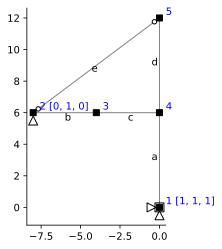

In [3]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

In [4]:
mdl.redundant(e['e'], '1')
mdl.redundant(e['b'], '3')
B = em.B_matrix(mdl)
B.barx

,$e_1$,$b_3$
$a_1$,-0.6,0.25
$a_2$,-4.8,2.00
$a_3$,4.8,-2.00
$b_1$,-0.8,0.00
$b_2$,0.0,0.00
$b_3$,0.0,1.00
$c_1$,-0.8,0.00
$c_2$,0.0,-1.00
$c_3$,0.0,2.00
$d_1$,-0.6,0.00


In [5]:
Q = em.column_vector(B)
A = em.A_matrix(mdl)
Vi = em.V_vector(A)

k0 = -0.002014
DL =  0.033333
e['a'].e0['2'] = -k0
e['a'].e0['3'] = -k0
e['b'].e0['2'] =  k0
e['b'].e0['3'] =  k0
e['d'].e0['1'] =  DL/e['d'].L

In [6]:
Q0 = em.Q_vector(B).o
Q0

,$Q_{{}}$
$a_1$,-0.000000e+00
$a_2$,1.007000e+02
$a_3$,-1.007000e+02
$b_1$,-0.000000e+00
$b_2$,-1.007000e+02
$b_3$,1.007000e+02
$c_1$,-0.000000e+00
$c_2$,0.000000e+00
$c_3$,0.000000e+00
$d_1$,-5.555500e+10


In [7]:
Uf = em.analysis.SolveDispl(mdl)
K = em.K_matrix(mdl)
U = em.U_vector(A, Uf)
V = A.f@Uf
Q = K.s@V + Q0
Q

,$Vector_{{fffff}}$
$a_{1}$,9.448183e+00
$a_{2}$,7.558545e+01
$a_{3}$,-7.558544e+01
$b_{1}$,-3.114132e+00
$b_{2}$,-6.000000e-14
$b_{3}$,4.713512e+01
$c_{1}$,-3.114132e+00
$c_{2}$,-4.713512e+01
$c_{3}$,9.427025e+01
$d_{1}$,-2.335594e+00


## Part 1

In [8]:
K = em.K_matrix(mdl)
K.f

,$1$,$2$,$3$,$4$,$5$,$6$,$7$,$8$,$9$,$10$,$11$
$P_{1}$,2.500000e+12,0.0,-2.500000e+12,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,-1280.000000,-9.600000e+02,0.000000
$P_{2}$,0.000000e+00,50000.0,0.000000e+00,-18750.0,25000.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
$P_{3}$,-2.500000e+12,0.0,5.000000e+12,0.0,0.0,-2.500000e+12,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
$P_{4}$,0.000000e+00,-18750.0,0.000000e+00,18750.0,0.0,0.000000e+00,-9.375000e+03,18750.000000,0.000000,0.000000e+00,0.000000
$P_{5}$,0.000000e+00,25000.0,0.000000e+00,0.0,100000.0,0.000000e+00,-1.875000e+04,25000.000000,0.000000,0.000000e+00,0.000000
$P_{6}$,0.000000e+00,0.0,-2.500000e+12,0.0,0.0,2.500000e+12,0.000000e+00,0.000000,-2777.777778,0.000000e+00,-8333.333333
$P_{7}$,0.000000e+00,0.0,0.000000e+00,-9375.0,-18750.0,0.000000e+00,3.333333e+12,-18750.000000,0.000000,-1.666667e+12,0.000000
$P_{8}$,0.000000e+00,0.0,0.000000e+00,18750.0,25000.0,0.000000e+00,-1.875000e+04,116666.666667,8333.333333,0.000000e+00,16666.666667
$P_{9}$,-1.280000e+03,0.0,0.000000e+00,0.0,0.0,-2.777778e+03,0.000000e+00,8333.333333,4057.777778,9.600000e+02,8333.333333
$P_{10}$,-9.600000e+02,0.0,0.000000e+00,0.0,0.0,0.000000e+00,-1.666667e+12,0.000000,960.000000,1.666667e+12,0.000000


In [9]:
UK = K.f.inv@[0, 6250, -100000, 50000]
UK

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 11)

In [ ]:
UL = K.f.inv@[1600, 1200., 0., 0.]
UL

In [ ]:
# Q.set_item('a_2', 87.947)
# Q.set_item('a_3', 54.824)
# Q.set_item('b_2',-54.824)
# Q.set_item('b_3', 22.844)
# Q.set_item('c_2',-22.844)
# Q.set_item('d_1', 15.497)